In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math
import librosa
import librosa.display
import warnings
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, f1_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import matplotlib

In [2]:
matplotlib.rcParams.update({'font.size': 22})

In [3]:
dataset_path = "./dataset"
genres_path = os.path.join(dataset_path, 'genres_original')
genres = os.listdir(genres_path)

In [4]:
data = pd.read_csv(f'{dataset_path}/features_3_sec.csv')

In [5]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [6]:
data = data.drop(columns=['length', 'filename'])

In [7]:
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [8]:
y = data['label']
X = data.loc[:, data.columns != 'label']

In [9]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
 
X = pd.DataFrame(np_scaled, columns = cols)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []

    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0}'.format(class_names[idx]) for idx, _  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)



[0.51, 0.31, 0.39]
[0.76, 0.89, 0.82]
[0.39, 0.6, 0.47]
[0.4, 0.36, 0.38]
[0.71, 0.36, 0.48]
[0.66, 0.41, 0.51]
[0.47, 0.91, 0.62]
[0.57, 0.78, 0.66]
[0.59, 0.48, 0.53]
[0.26, 0.16, 0.2]
plotMat: [[0.51, 0.31, 0.39], [0.76, 0.89, 0.82], [0.39, 0.6, 0.47], [0.4, 0.36, 0.38], [0.71, 0.36, 0.48], [0.66, 0.41, 0.51], [0.47, 0.91, 0.62], [0.57, 0.78, 0.66], [0.59, 0.48, 0.53], [0.26, 0.16, 0.2]]
support: [208, 203, 186, 199, 218, 192, 204, 180, 211, 197]
Accuracy 0.52302


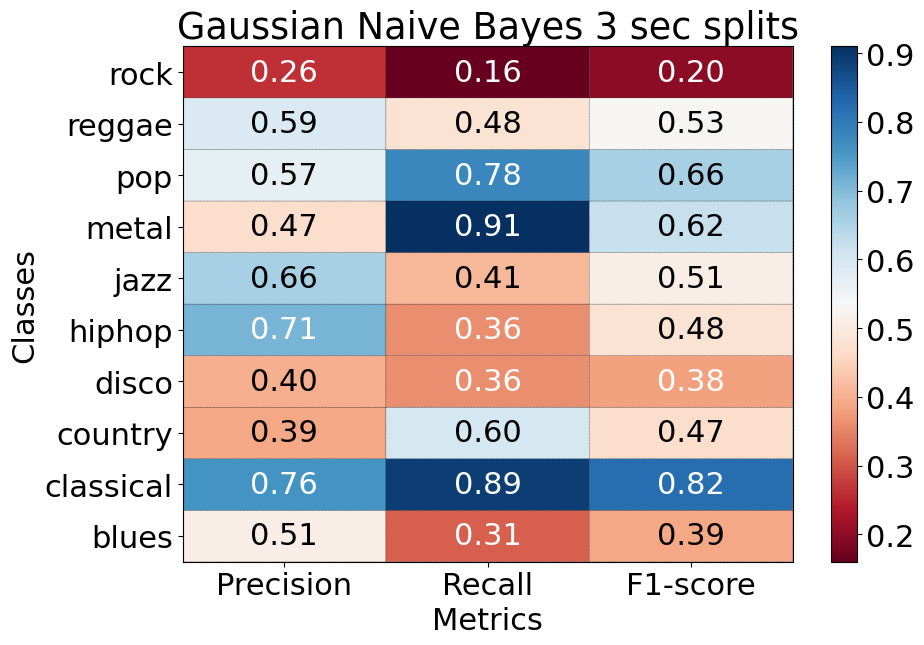

In [12]:
nb = GaussianNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
plot_classification_report(classification_report(y_test, preds), title="Gaussian Naive Bayes 3 sec splits")
print('Accuracy', round(accuracy_score(y_test, preds), 5))
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds))
# disp.plot()
# plt.show()

[0.85, 0.79, 0.82]
[0.92, 0.97, 0.94]
[0.66, 0.73, 0.69]
[0.74, 0.76, 0.75]
[0.91, 0.83, 0.87]
[0.82, 0.91, 0.86]
[0.83, 0.95, 0.88]
[0.89, 0.88, 0.89]
[0.79, 0.82, 0.81]
[0.77, 0.55, 0.64]
plotMat: [[0.85, 0.79, 0.82], [0.92, 0.97, 0.94], [0.66, 0.73, 0.69], [0.74, 0.76, 0.75], [0.91, 0.83, 0.87], [0.82, 0.91, 0.86], [0.83, 0.95, 0.88], [0.89, 0.88, 0.89], [0.79, 0.82, 0.81], [0.77, 0.55, 0.64]]
support: [208, 203, 186, 199, 218, 192, 204, 180, 211, 197]
Accuracy 0.81932


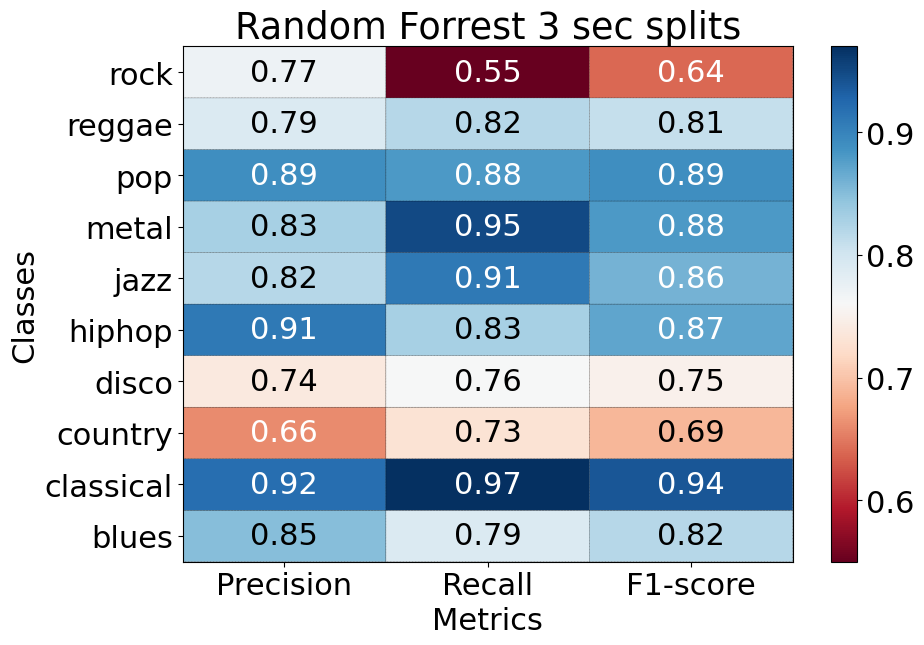

In [13]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X_train, y_train)
preds = rforest.predict(X_test)
plot_classification_report(classification_report(y_test, preds), title="Random Forrest 3 sec splits")
print('Accuracy', round(accuracy_score(y_test, preds), 5))

[0.87, 0.83, 0.85]
[0.86, 0.97, 0.91]
[0.73, 0.82, 0.77]
[0.72, 0.85, 0.78]
[0.89, 0.7, 0.78]
[0.86, 0.84, 0.85]
[0.93, 0.89, 0.91]
[0.88, 0.87, 0.87]
[0.81, 0.82, 0.81]
[0.81, 0.74, 0.77]
plotMat: [[0.87, 0.83, 0.85], [0.86, 0.97, 0.91], [0.73, 0.82, 0.77], [0.72, 0.85, 0.78], [0.89, 0.7, 0.78], [0.86, 0.84, 0.85], [0.93, 0.89, 0.91], [0.88, 0.87, 0.87], [0.81, 0.82, 0.81], [0.81, 0.74, 0.77]]
support: [208, 203, 186, 199, 218, 192, 204, 180, 211, 197]
Accuracy 0.83133


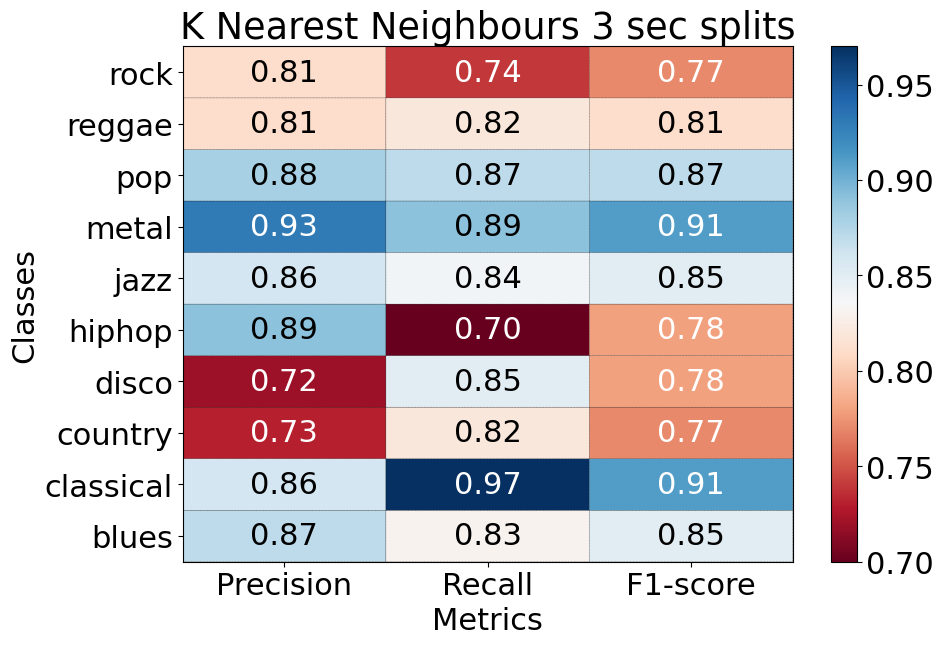

In [14]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
plot_classification_report(classification_report(y_test, preds), title="K Nearest Neighbours 3 sec splits")
print('Accuracy', round(accuracy_score(y_test, preds), 5))

[0.72, 0.76, 0.74]
[0.86, 0.97, 0.91]
[0.69, 0.69, 0.69]
[0.62, 0.68, 0.65]
[0.83, 0.73, 0.78]
[0.79, 0.8, 0.8]
[0.83, 0.92, 0.87]
[0.84, 0.87, 0.86]
[0.77, 0.7, 0.73]
[0.62, 0.49, 0.54]
plotMat: [[0.72, 0.76, 0.74], [0.86, 0.97, 0.91], [0.69, 0.69, 0.69], [0.62, 0.68, 0.65], [0.83, 0.73, 0.78], [0.79, 0.8, 0.8], [0.83, 0.92, 0.87], [0.84, 0.87, 0.86], [0.77, 0.7, 0.73], [0.62, 0.49, 0.54]]
support: [208, 203, 186, 199, 218, 192, 204, 180, 211, 197]
Accuracy 0.75976


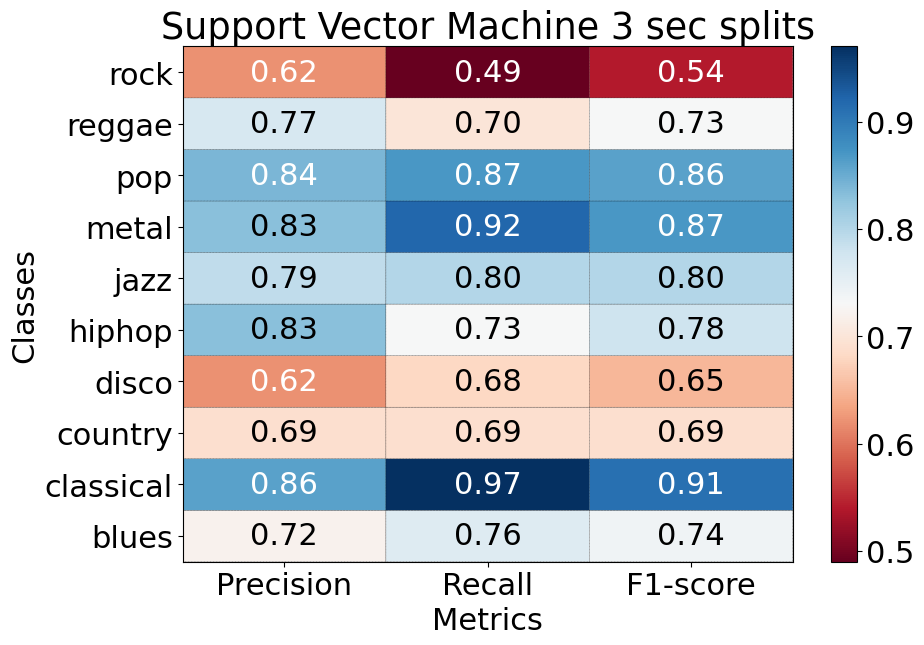

In [15]:
svm = SVC(decision_function_shape="ovo")
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
plot_classification_report(classification_report(y_test, preds), title="Support Vector Machine 3 sec splits")
print('Accuracy', round(accuracy_score(y_test, preds), 5))

In [16]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

[0.89, 0.89, 0.89]
[0.93, 0.98, 0.95]
[0.79, 0.87, 0.83]
[0.88, 0.85, 0.87]
[0.93, 0.89, 0.91]
[0.9, 0.93, 0.91]
[0.94, 0.95, 0.95]
[0.93, 0.96, 0.94]
[0.9, 0.85, 0.87]
[0.86, 0.78, 0.82]
plotMat: [[0.89, 0.89, 0.89], [0.93, 0.98, 0.95], [0.79, 0.87, 0.83], [0.88, 0.85, 0.87], [0.93, 0.89, 0.91], [0.9, 0.93, 0.91], [0.94, 0.95, 0.95], [0.93, 0.96, 0.94], [0.9, 0.85, 0.87], [0.86, 0.78, 0.82]]
support: [208, 203, 186, 199, 218, 192, 204, 180, 211, 197]
Accuracy 0.89439


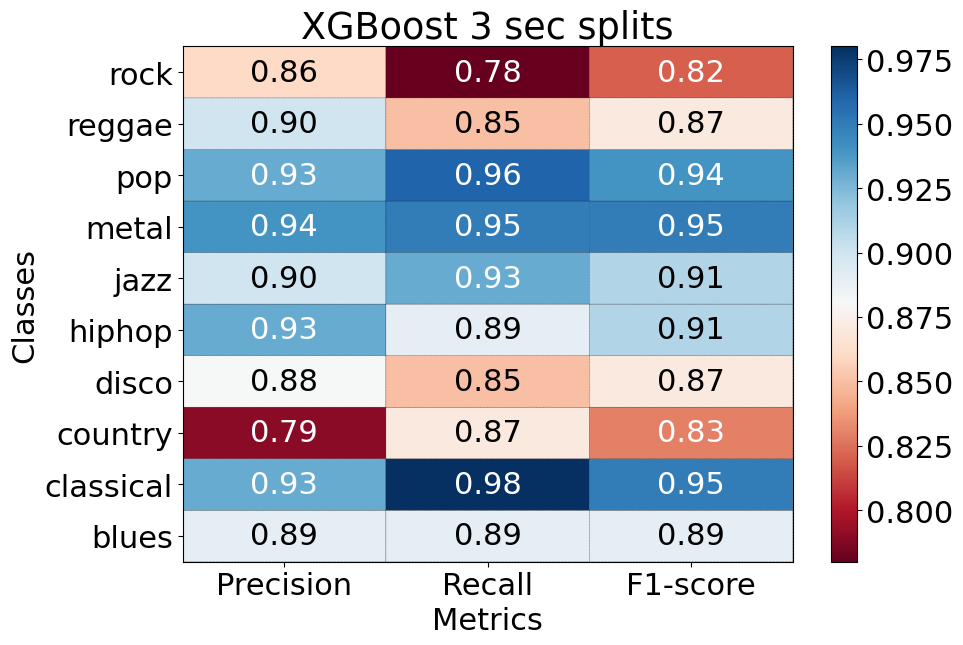

In [17]:
plot_classification_report(classification_report(y_test, preds), title="XGBoost 3 sec splits")
print('Accuracy', round(accuracy_score(y_test, preds), 5))